### Importing:

In [69]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import seaborn as sns

# Load the dataset
df = pd.read_csv('Cleaned_2.csv')

### Data exploration:

In [70]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 id                        0
city                      0
postal_code               0
district                  0
province                  0
price                     0
subtype                   0
state_construction     7945
living_area               0
terrace_area          22403
garden_area           21112
rooms                 21593
bedrooms                197
bathrooms              2723
livingroom_surface    16893
kitchen_surface       18061
facades                5922
has_garden            18970
kitchen               12281
fireplace             24488
swimmingpool          29435
has_terrace           14549
has_attic             21412
has_basement          18402
construction_year     12156
epc                    5485
area_total                0
dtype: int64


In [71]:
df['state_construction'] = df.state_construction.replace({
    'TO_RESTORE': 3,
    "TO_RENOVATE": 3,
    "TO_BE_DONE_UP": 3,
    "JUST_RENOVATED": 2,
    "GOOD": 2,
    "AS_NEW": 1
})

C:\Users\ygale\AppData\Local\Temp\ipykernel_12428\2657092176.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['state_construction'] = df.state_construction.replace({


In [72]:
df.epc.unique()

array([nan, 'B', 'E', 'A', 'C', 'F', 'G', 'D', 'A++', 'A+_A++', 'A+',
       'A_A+', 'F_E'], dtype=object)

In [73]:

df['epc'] = df['epc'].replace({
    'A+_A++': 1,
    'A+': 1,
    'A_A+': 1,
    'A++': 1,
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7,
    'F_E': 8
})

# Check the unique values after replacement
print(df['epc'].unique())

[nan  2.  5.  1.  3.  6.  7.  4.  8.]


C:\Users\ygale\AppData\Local\Temp\ipykernel_12428\1358846848.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['epc'] = df['epc'].replace({


### Data preprocessing:

In [27]:
# nan_df = df.isnull()
# nan_atrtribute = nan_df.sum()
# # Drop the columns that have more than 1000 missing values
# columns_to_drop = nan_atrtribute[nan_atrtribute > 10000].index

# df_cleaned = df.drop(columns=columns_to_drop)

# # Print the columns that were dropped
# print(columns_to_drop)
# df_cleaned.head()

Index(['terrace_area', 'garden_area', 'rooms', 'livingroom_surface',
       'kitchen_surface', 'has_garden', 'kitchen', 'fireplace', 'swimmingpool',
       'has_terrace', 'has_attic', 'has_basement', 'construction_year'],
      dtype='object')


,id,city,postal_code,district,province,price,subtype,state_construction,living_area,bedrooms,bathrooms,facades,epc,area_total
0,1882546,wenduine,8420,oostend,west flanders,163000.0,CHALET,1.0,62.0,2.0,1.0,4.0,NaN,155.0
1,2784938,heist-aan-zee,8301,brugge,west flanders,108000.0,BUNGALOW,1.0,51.0,2.0,1.0,4.0,NaN,170.0
2,6675519,zonhoven,3520,hasselt,limburg,392422.0,HOUSE,NaN,206.0,3.0,1.0,NaN,NaN,370.0
3,7066131,bredene,8450,oostend,west flanders,245000.0,HOUSE,1.0,76.0,2.0,1.0,4.0,2.0,150.0
4,7222190,geel,2440,turnhout,antwerp,335527.0,HOUSE,NaN,160.0,3.0,NaN,NaN,NaN,431.0


In [74]:
columns_to_update = ['has_garden', 'kitchen', 'fireplace', 'swimmingpool','has_terrace', 'has_attic', 'has_basement']

# Replace NaN values with 0 for the specified columns
df[columns_to_update] = df[columns_to_update].fillna(0)

# Verify the change
# Display the first few rows to check the updates
print(df[columns_to_update].head())

   has_garden  kitchen  fireplace  swimmingpool  has_terrace  has_attic  \
0         1.0      1.0        0.0           0.0          0.0        0.0   
1         1.0      1.0        0.0           0.0          0.0        0.0   
2         1.0      1.0        0.0           0.0          0.0        0.0   
3         1.0      1.0        0.0           0.0          0.0        0.0   
4         0.0      0.0        0.0           0.0          0.0        0.0   

   has_basement  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


In [75]:
columns_to_drop = ['terrace_area', 'garden_area', 'rooms', 'livingroom_surface',
       'kitchen_surface', 'construction_year']

df_cleaned = df.drop(columns=columns_to_drop)

# Print the columns that were dropped
print(columns_to_drop)
df_cleaned.head()

['terrace_area', 'garden_area', 'rooms', 'livingroom_surface', 'kitchen_surface', 'construction_year']


,id,city,postal_code,district,province,price,subtype,state_construction,living_area,bedrooms,...,facades,has_garden,kitchen,fireplace,swimmingpool,has_terrace,has_attic,has_basement,epc,area_total
0,1882546,wenduine,8420,oostend,west flanders,163000.0,CHALET,1.0,62.0,2.0,...,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,155.0
1,2784938,heist-aan-zee,8301,brugge,west flanders,108000.0,BUNGALOW,1.0,51.0,2.0,...,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,170.0
2,6675519,zonhoven,3520,hasselt,limburg,392422.0,HOUSE,NaN,206.0,3.0,...,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,370.0
3,7066131,bredene,8450,oostend,west flanders,245000.0,HOUSE,1.0,76.0,2.0,...,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,150.0
4,7222190,geel,2440,turnhout,antwerp,335527.0,HOUSE,NaN,160.0,3.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,431.0


In [76]:
print(df_cleaned.dtypes)

id                      int64
city                   object
postal_code             int64
district               object
province               object
price                 float64
subtype                object
state_construction    float64
living_area           float64
bedrooms              float64
bathrooms             float64
facades               float64
has_garden            float64
kitchen               float64
fireplace             float64
swimmingpool          float64
has_terrace           float64
has_attic             float64
has_basement          float64
epc                   float64
area_total            float64
dtype: object


In [77]:
# Transpose the data frame so that it fits in a cell
df_cleaned.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,30554.0,NaN,NaN,NaN,10964147.361393,247861.272386,1882546.0,10904960.75,11039024.5,11112010.5,11157693.0
city,30554,3168,gent,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
postal_code,30554.0,NaN,NaN,NaN,5508.566931,2913.70015,1000.0,2812.0,5190.0,8510.0,9992.0
district,30554,43,antwerp,2304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
province,30554,11,east flanders,5087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,30554.0,NaN,NaN,NaN,477917.990836,541683.95801,2500.0,259000.0,369000.0,520000.0,15000000.0
subtype,30554,8,HOUSE,25367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state_construction,22609.0,NaN,NaN,NaN,2.099429,0.697866,1.0,2.0,2.0,3.0,3.0
living_area,30554.0,NaN,NaN,NaN,210.707796,199.245169,7.0,140.0,177.0,232.0,19772.0
bedrooms,30357.0,NaN,NaN,NaN,3.504661,1.418314,1.0,3.0,3.0,4.0,70.0


In [78]:
def drop_specified_columns(df):
    """Drop specified columns."""
    df.drop(
        ["id", "city", "postal_code", "province", "subtype", "facades",], axis=1, inplace=True
    )
    return df

In [79]:
df=drop_specified_columns(df_cleaned)
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
district,30554,43,antwerp,2304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,30554.0,NaN,NaN,NaN,477917.990836,541683.95801,2500.0,259000.0,369000.0,520000.0,15000000.0
state_construction,22609.0,NaN,NaN,NaN,2.099429,0.697866,1.0,2.0,2.0,3.0,3.0
living_area,30554.0,NaN,NaN,NaN,210.707796,199.245169,7.0,140.0,177.0,232.0,19772.0
bedrooms,30357.0,NaN,NaN,NaN,3.504661,1.418314,1.0,3.0,3.0,4.0,70.0
bathrooms,27831.0,NaN,NaN,NaN,1.396357,0.899131,1.0,1.0,1.0,2.0,25.0
has_garden,30554.0,NaN,NaN,NaN,0.379132,0.485179,0.0,0.0,0.0,1.0,1.0
kitchen,30554.0,NaN,NaN,NaN,0.598056,0.490299,0.0,0.0,1.0,1.0,1.0
fireplace,30554.0,NaN,NaN,NaN,0.198534,0.398903,0.0,0.0,0.0,0.0,1.0
swimmingpool,30554.0,NaN,NaN,NaN,0.036624,0.187839,0.0,0.0,0.0,0.0,1.0


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'state_construction'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'has_garden'}>,
        <Axes: title={'center': 'kitchen'}>,
        <Axes: title={'center': 'fireplace'}>],
       [<Axes: title={'center': 'swimmingpool'}>,
        <Axes: title={'center': 'has_terrace'}>,
        <Axes: title={'center': 'has_attic'}>,
        <Axes: title={'center': 'has_basement'}>],
       [<Axes: title={'center': 'epc'}>,
        <Axes: title={'center': 'area_total'}>, <Axes: >, <Axes: >]],
      dtype=object)

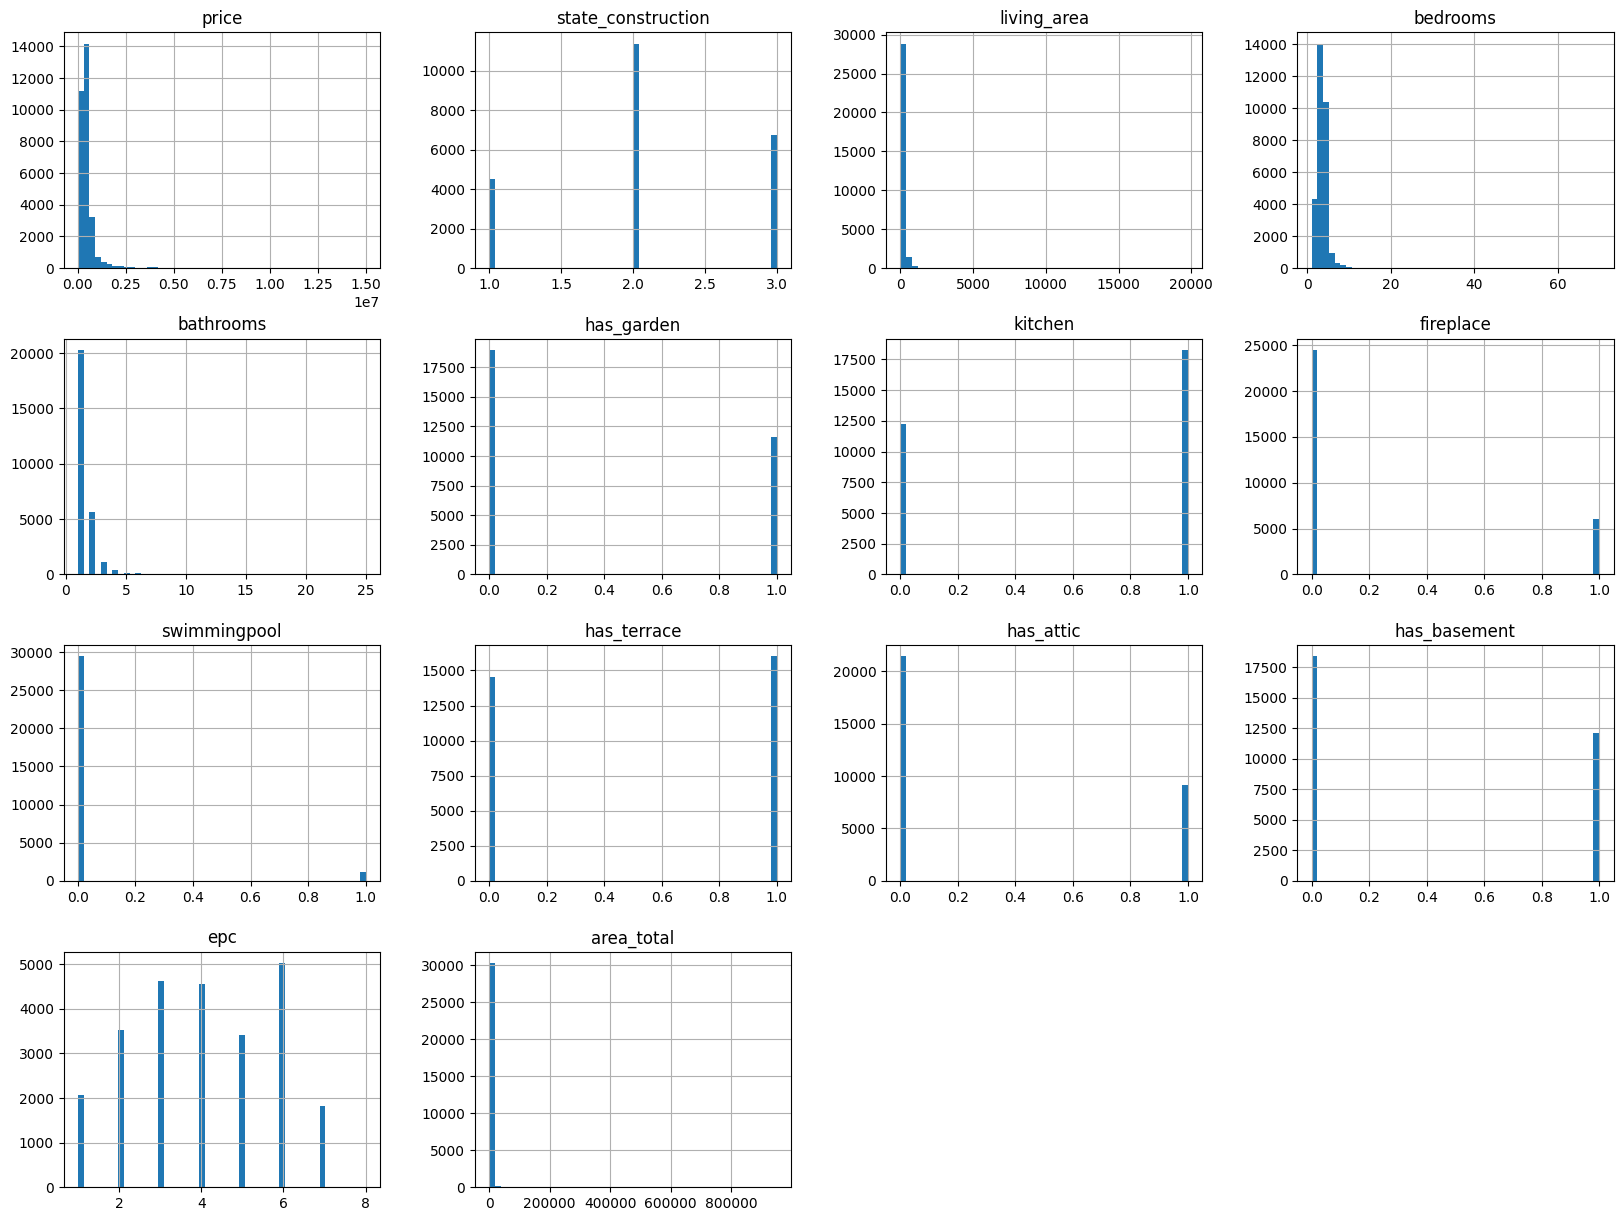

In [80]:
df.hist(bins=50, figsize=(20,15))

In [81]:
df.columns

Index(['district', 'price', 'state_construction', 'living_area', 'bedrooms',
       'bathrooms', 'has_garden', 'kitchen', 'fireplace', 'swimmingpool',
       'has_terrace', 'has_attic', 'has_basement', 'epc', 'area_total'],
      dtype='object')

In [82]:
df.isnull().sum()

district                 0
price                    0
state_construction    7945
living_area              0
bedrooms               197
bathrooms             2723
has_garden               0
kitchen                  0
fireplace                0
swimmingpool             0
has_terrace              0
has_attic                0
has_basement             0
epc                   5485
area_total               0
dtype: int64

In [83]:
df.dropna(subset=['bedrooms'], inplace=True)
df['bathrooms'] = df['bathrooms'].fillna(1)
df['epc'] = df['epc'].fillna(-1)
df['state_construction'] = df['state_construction'].fillna(-1)

In [84]:
df.isnull().sum()

district              0
price                 0
state_construction    0
living_area           0
bedrooms              0
bathrooms             0
has_garden            0
kitchen               0
fireplace             0
swimmingpool          0
has_terrace           0
has_attic             0
has_basement          0
epc                   0
area_total            0
dtype: int64

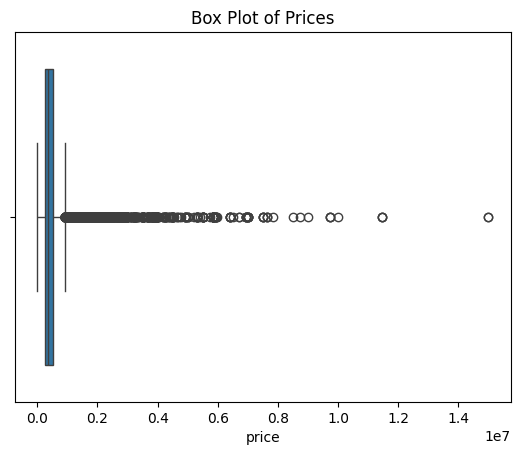

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for the 'price' column
sns.boxplot(x=df['price'])
plt.title('Box Plot of Prices')
plt.show()

In [86]:
# Calculate Q1, Q3, and IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

print(f"Number of outliers detected: {len(outliers)}")
print(lower_bound, upper_bound)

Number of outliers detected: 1953
-132500.0 911500.0


In [87]:
df['price'].min()

2500.0

In [88]:
# Filter the DataFrame to keep only rows where 'price' is within the specified range
df = df[(df['price'] >= 40000) & (df['price'] <= 1000000)]
df.shape

(28744, 15)

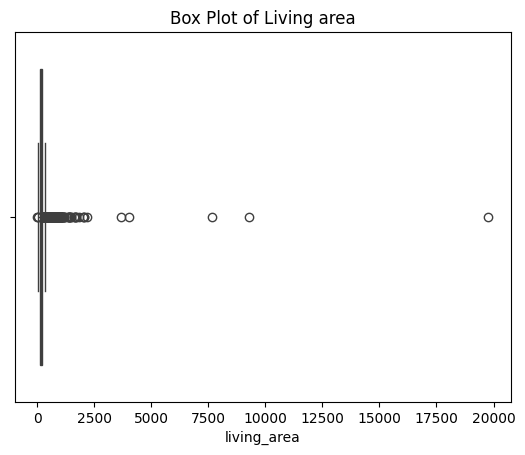

In [89]:
# Create a box plot for the 'price' column
sns.boxplot(x=df['living_area'])
plt.title('Box Plot of Living area')
plt.show()

In [90]:
# Calculate Q1, Q3, and IQR
Q1 = df['living_area'].quantile(0.25)
Q3 = df['living_area'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound_area = Q1 - 1.5 * IQR
upper_bound_area = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['living_area'] < lower_bound_area) | (df['living_area'] > upper_bound_area)]

print(f"Number of outliers detected: {len(outliers)}")
print(lower_bound_area, upper_bound_area)

Number of outliers detected: 1582
20.0 340.0


In [91]:
df = df[(df['living_area'] >= lower_bound_area) &
                 (df['living_area'] <= upper_bound_area)]

In [92]:
df.shape

(27162, 15)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'state_construction'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'has_garden'}>,
        <Axes: title={'center': 'kitchen'}>,
        <Axes: title={'center': 'fireplace'}>],
       [<Axes: title={'center': 'swimmingpool'}>,
        <Axes: title={'center': 'has_terrace'}>,
        <Axes: title={'center': 'has_attic'}>,
        <Axes: title={'center': 'has_basement'}>],
       [<Axes: title={'center': 'epc'}>,
        <Axes: title={'center': 'area_total'}>, <Axes: >, <Axes: >]],
      dtype=object)

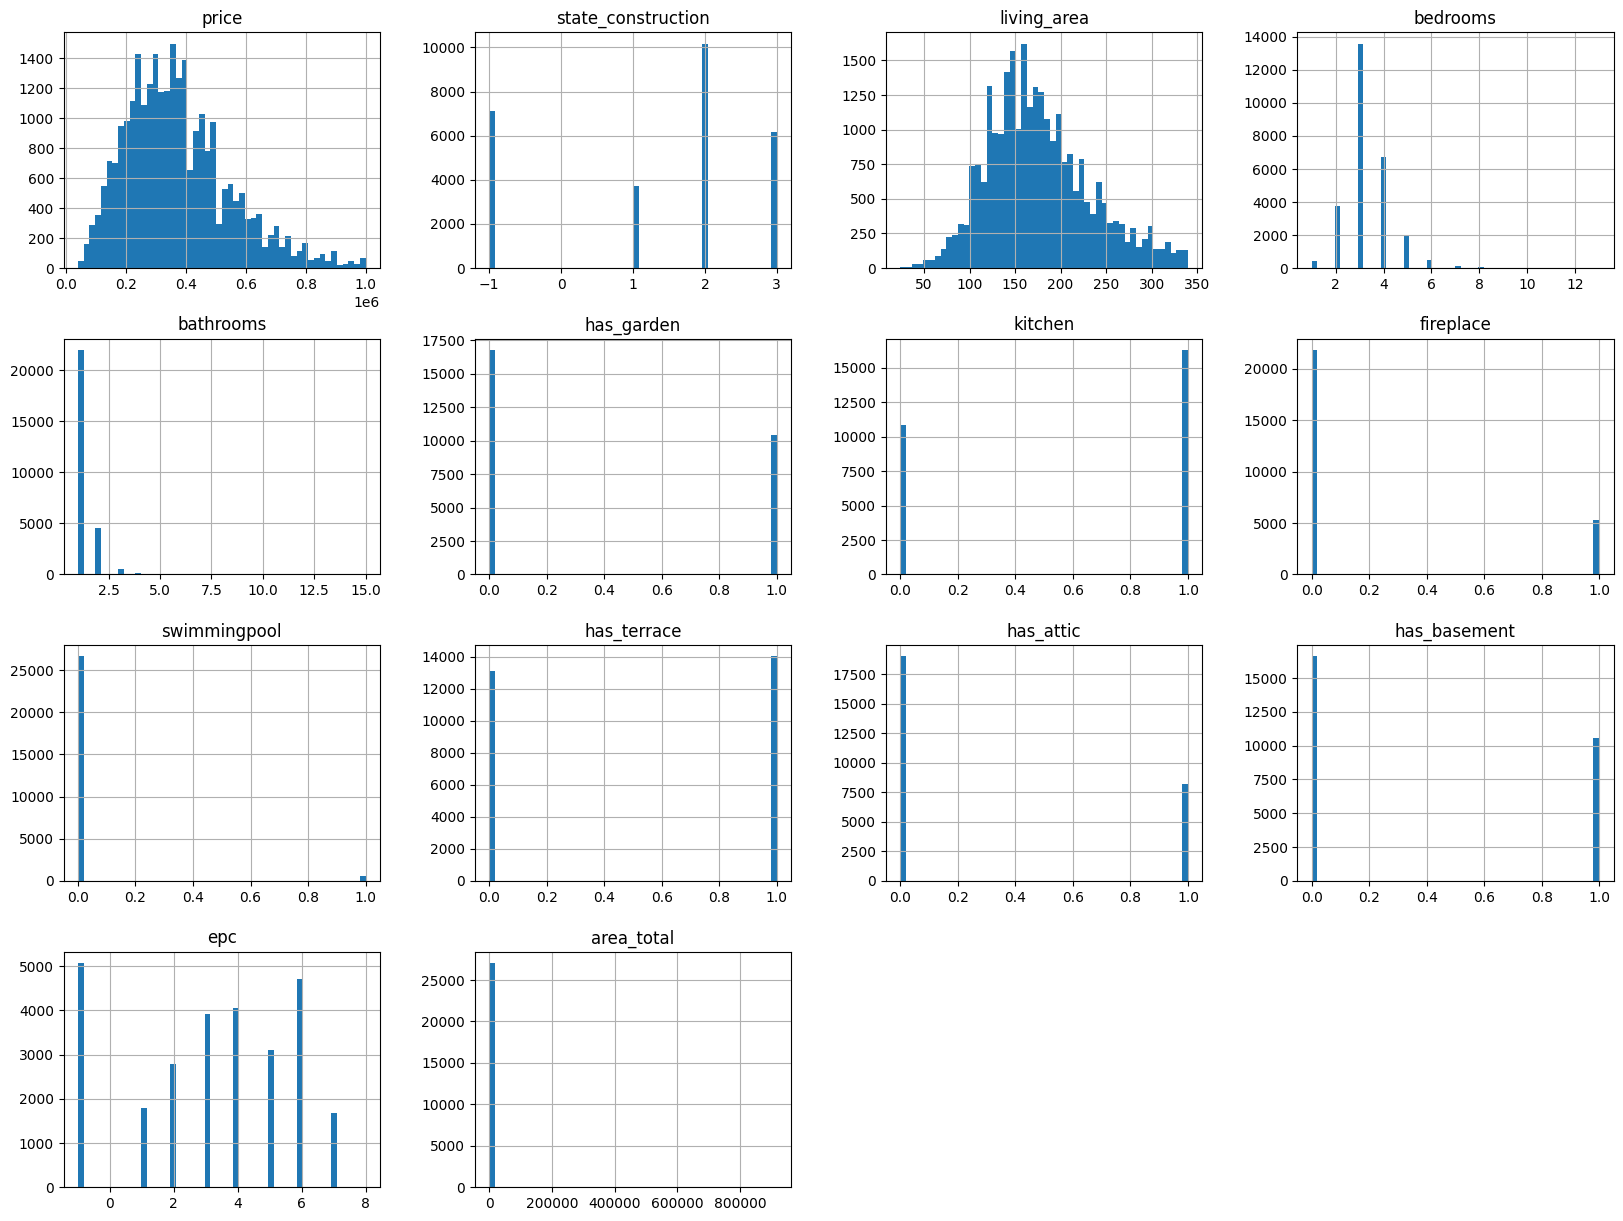

In [93]:
df.hist(bins=50, figsize=(20, 15))

In [94]:
# Calculate Q1, Q3, and IQR
Q1 = df['area_total'].quantile(0.25)
Q3 = df['area_total'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound_total_area = Q1 - 1.5 * IQR
upper_bound_total_area = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['area_total'] < lower_bound_area) |
              (df['area_total'] > upper_bound_area)]

print(f"Number of outliers detected: {len(outliers)}")
print(lower_bound_area, upper_bound_area)

Number of outliers detected: 16222
20.0 340.0


In [95]:
df['area_total'].max()

917440.0

In [333]:
# df = df[(df['area_total'] >= lower_bound_area) &
#         (df['area_total'] <= upper_bound_area)]

In [96]:
df.shape

(27162, 15)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'state_construction'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'has_garden'}>,
        <Axes: title={'center': 'kitchen'}>,
        <Axes: title={'center': 'fireplace'}>],
       [<Axes: title={'center': 'swimmingpool'}>,
        <Axes: title={'center': 'has_terrace'}>,
        <Axes: title={'center': 'has_attic'}>,
        <Axes: title={'center': 'has_basement'}>],
       [<Axes: title={'center': 'epc'}>,
        <Axes: title={'center': 'area_total'}>, <Axes: >, <Axes: >]],
      dtype=object)

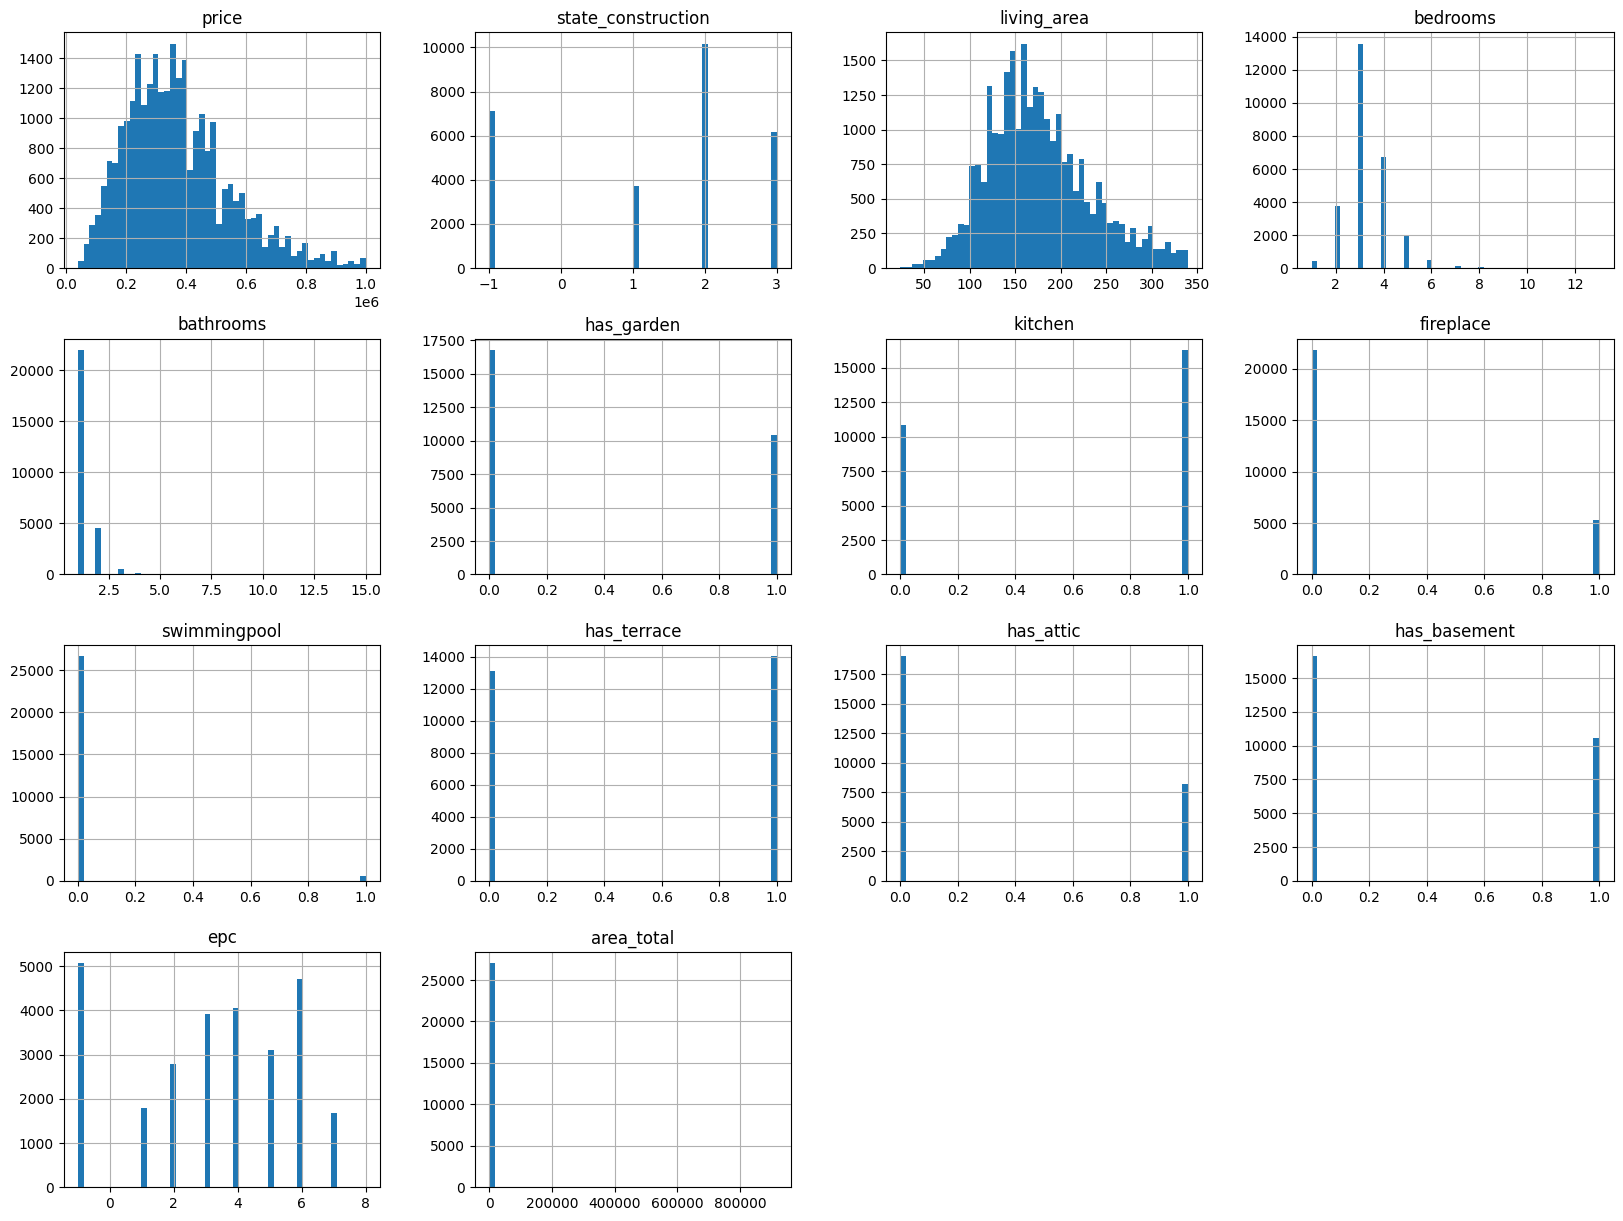

In [97]:
df.hist(bins=50, figsize=(20, 15))

In [98]:
df['bathrooms'].value_counts()

bathrooms
1.0     21967
2.0      4577
3.0       487
4.0        92
5.0        20
6.0         6
7.0         4
10.0        3
11.0        2
15.0        1
8.0         1
12.0        1
14.0        1
Name: count, dtype: int64

In [99]:
df = df[(df['bathrooms'] <= 4)]
df['bathrooms'].value_counts()

bathrooms
1.0    21967
2.0     4577
3.0      487
4.0       92
Name: count, dtype: int64

In [100]:
numerical_cols = ['price', 'living_area',
                  'bedrooms', 'bathrooms', 'area_total', 'epc', 'state_construction']
df_numerical = df[numerical_cols]

# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()
correlation_matrix

,price,living_area,bedrooms,bathrooms,area_total,epc,state_construction
price,1.000000,0.543522,0.344400,0.320174,0.098834,-0.394036,-0.121743
living_area,0.543522,1.000000,0.541879,0.338341,0.055229,-0.119659,-0.030955
bedrooms,0.344400,0.541879,1.000000,0.343562,0.045981,-0.052222,-0.030120
bathrooms,0.320174,0.338341,0.343562,1.000000,0.010026,-0.048854,-0.019225
area_total,0.098834,0.055229,0.045981,0.010026,1.000000,0.026821,0.000171
epc,-0.394036,-0.119659,-0.052222,-0.048854,0.026821,1.000000,0.273651
state_construction,-0.121743,-0.030955,-0.030120,-0.019225,0.000171,0.273651,1.000000


In [179]:
# from sklearn.preprocessing import OneHotEncoder


# # Initialize the OneHotEncoder
# ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# # Fit and transform the 'district' column
# # Note: OneHotEncoder expects a 2D array, hence the reshape
# district_encoded = ohe.fit_transform(df[['district']])

# # Convert the encoded result into a DataFrame with appropriate column names
# district_encoded_df = pd.DataFrame(
#     district_encoded, columns=ohe.get_feature_names_out(['district']))

# # Concatenate the new DataFrame with the original DataFrame (minus the 'district' column)
# df_encoded = pd.concat(
#     [df.drop(['district'], axis=1), district_encoded_df], axis=1)

In [101]:
data = df
# .drop(columns='area_total')

# Check the columns of 'data' to confirm 'total_area' has been dropped
data_columns = data.columns
print(data_columns)

Index(['district', 'price', 'state_construction', 'living_area', 'bedrooms',
       'bathrooms', 'has_garden', 'kitchen', 'fireplace', 'swimmingpool',
       'has_terrace', 'has_attic', 'has_basement', 'epc', 'area_total'],
      dtype='object')


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'state_construction'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'has_garden'}>,
        <Axes: title={'center': 'kitchen'}>,
        <Axes: title={'center': 'fireplace'}>],
       [<Axes: title={'center': 'swimmingpool'}>,
        <Axes: title={'center': 'has_terrace'}>,
        <Axes: title={'center': 'has_attic'}>,
        <Axes: title={'center': 'has_basement'}>],
       [<Axes: title={'center': 'epc'}>,
        <Axes: title={'center': 'area_total'}>, <Axes: >, <Axes: >]],
      dtype=object)

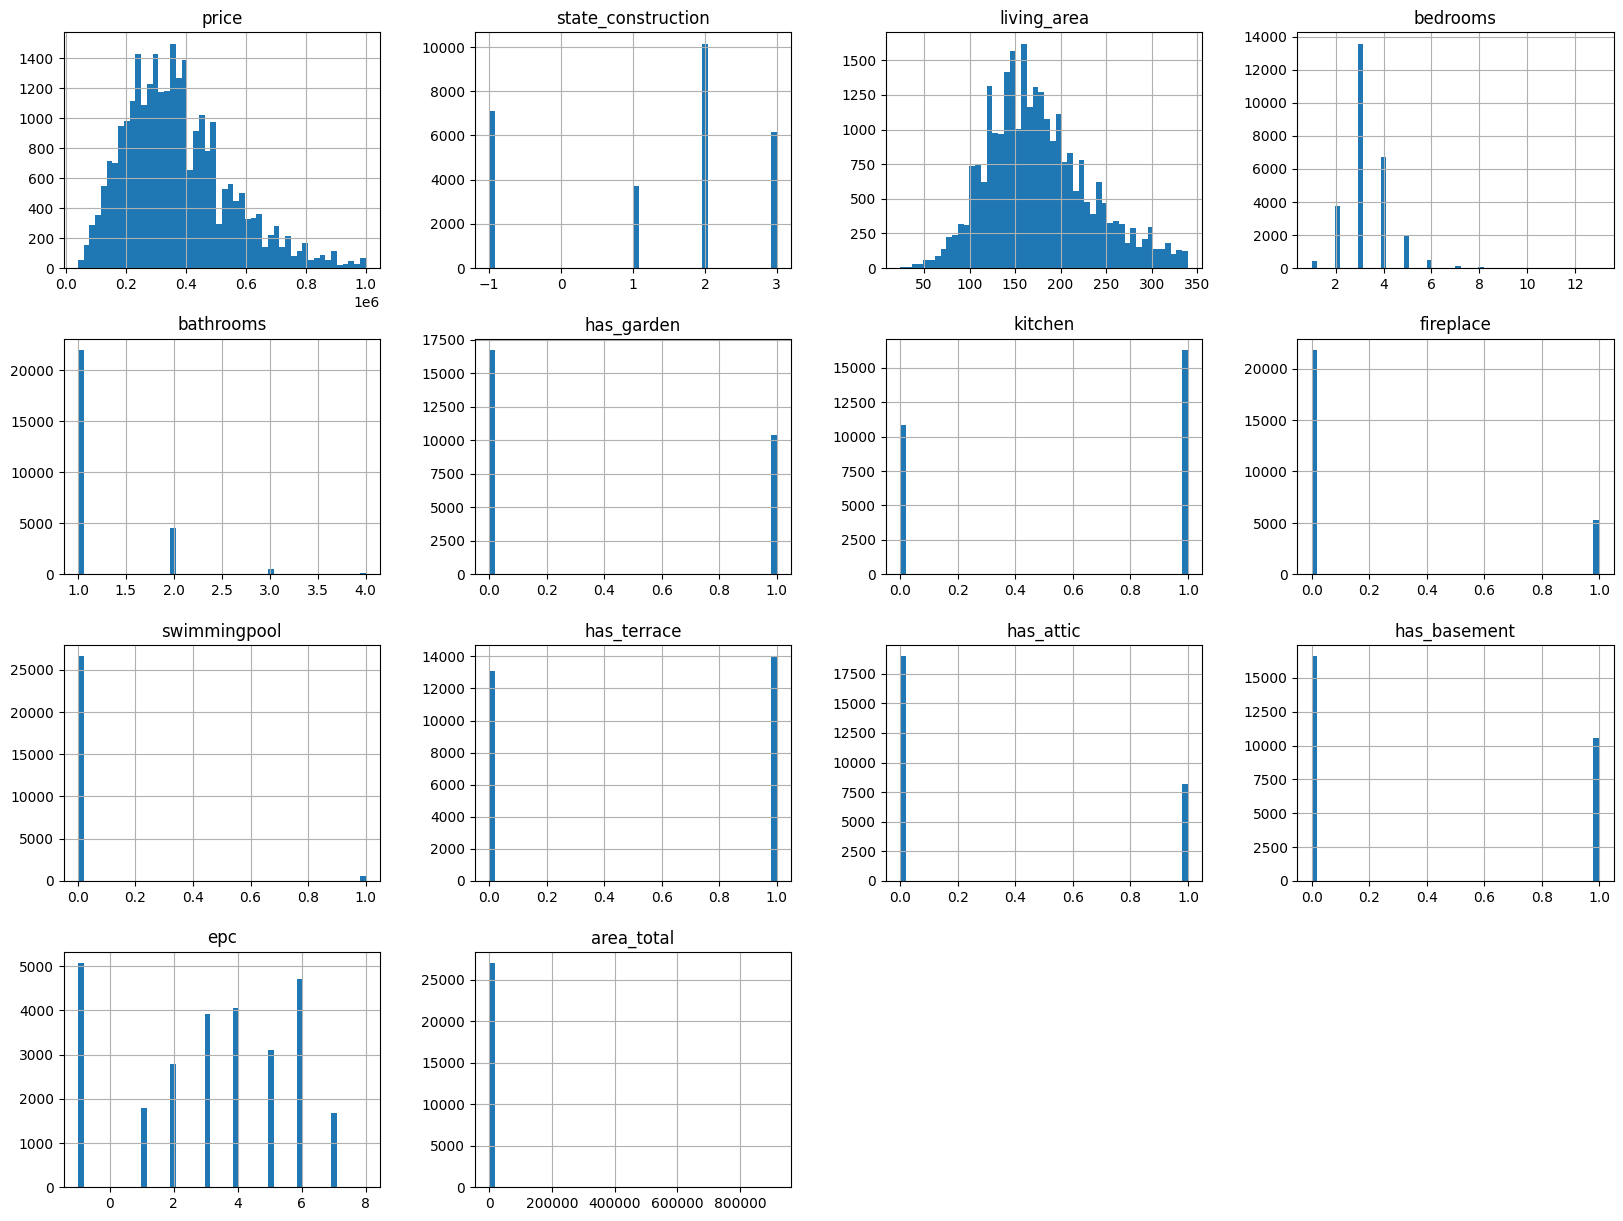

In [102]:
data.hist(bins=50, figsize=(20, 15))

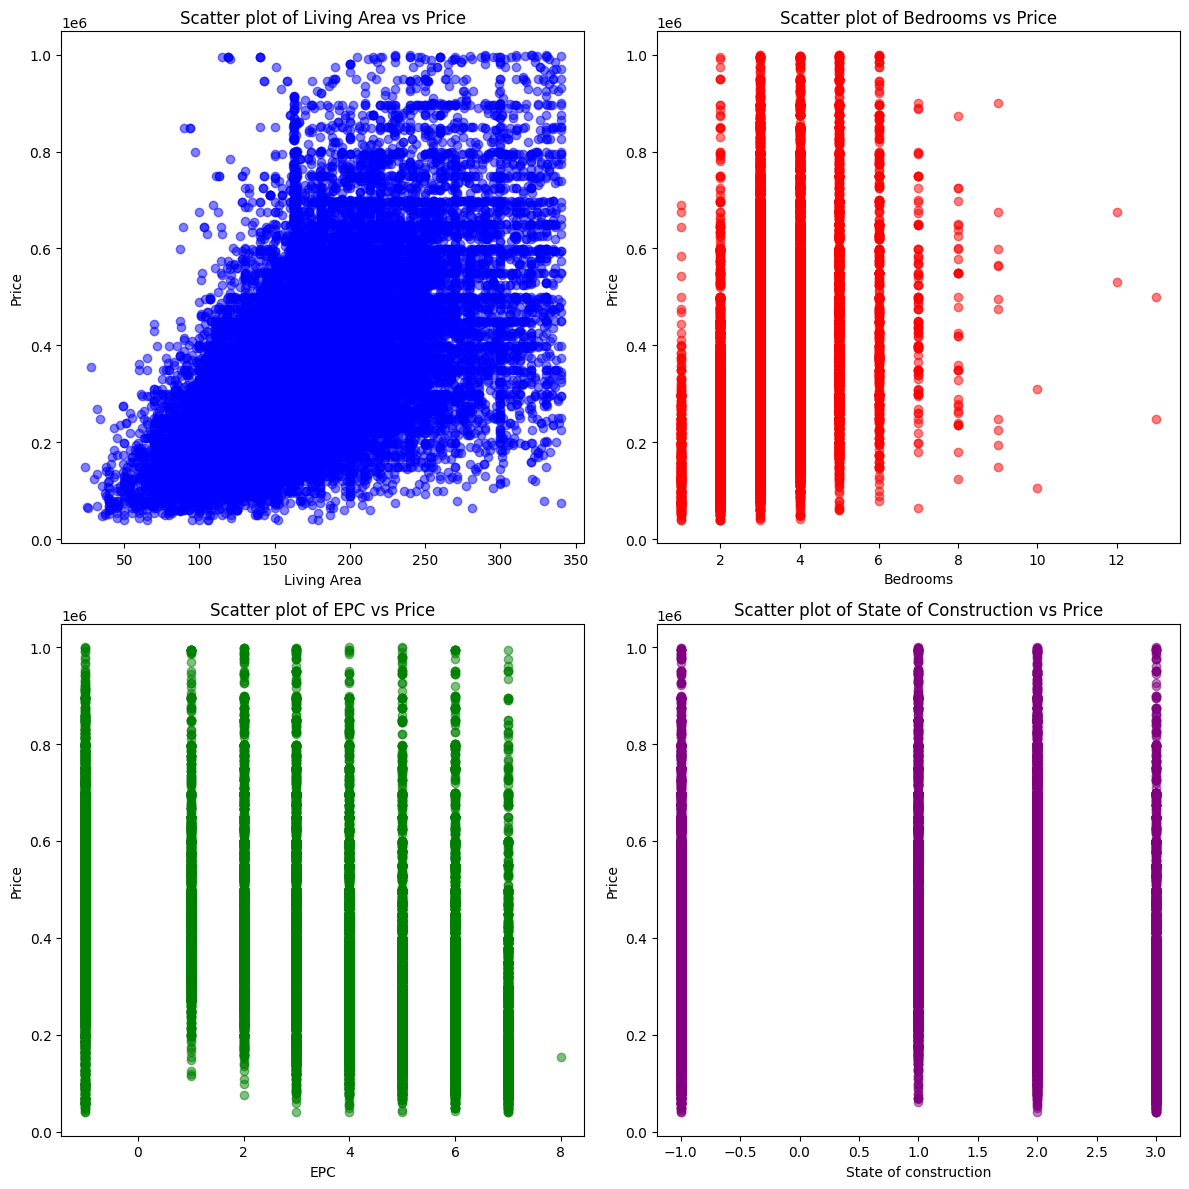

In [103]:


# Creating a figure and subplots
# Adjusted the figure size for better readability
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Scatter plot for 'living_area' vs 'price'
axs[0, 0].scatter(df['living_area'], df['price'], color='blue', alpha=0.5)
axs[0, 0].set_title('Scatter plot of Living Area vs Price')
axs[0, 0].set_xlabel('Living Area')
axs[0, 0].set_ylabel('Price')

# Scatter plot for 'bedrooms' vs 'price'
axs[0, 1].scatter(df['bedrooms'], df['price'], color='red', alpha=0.5)
axs[0, 1].set_title('Scatter plot of Bedrooms vs Price')
axs[0, 1].set_xlabel('Bedrooms')
axs[0, 1].set_ylabel('Price')

# Scatter plot for 'epc' vs 'price'
axs[1, 0].scatter(df['epc'], df['price'], color='green', alpha=0.5)
axs[1, 0].set_title('Scatter plot of EPC vs Price')
axs[1, 0].set_xlabel('EPC')
axs[1, 0].set_ylabel('Price')

# Scatter plot for 'state_construction' vs 'price'
axs[1, 1].scatter(df['state_construction'], df['price'],
                  color='purple', alpha=0.5)
axs[1, 1].set_title('Scatter plot of State of Construction vs Price')
axs[1, 1].set_xlabel('State of construction')
axs[1, 1].set_ylabel('Price')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np


# Define the features and the target
X = data.drop('price', axis=1)
y = data['price']

# Define the categorical columns that need to be encoded
categorical_features = ['district']

# Create a transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  # Keep the other columns as they are
)

X_transformed = preprocessor.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42)


In [105]:


# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [106]:

# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 113357.44226146919


In [107]:
train_score = model.score(X_train, y_train)
print(train_score)

0.5843352016393164


In [108]:
model.predict(X_test)

array([469522.60850842, 465207.55646119, 536177.52856147, ...,
       512014.79991224, 239973.09896207, 213487.6630133 ])

In [109]:
model.score(X_test, y_test)

0.5691075800789838

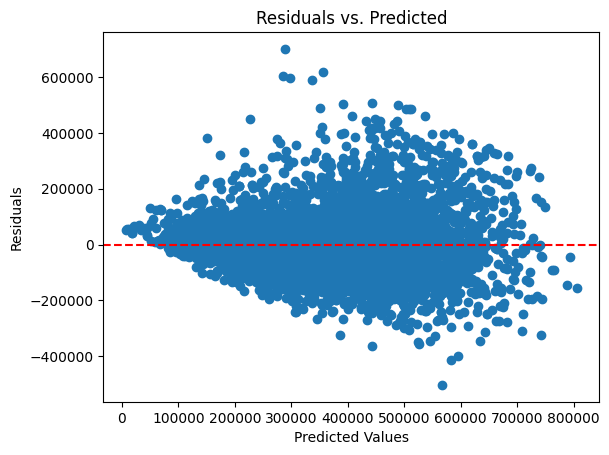

In [110]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.title('Residuals vs. Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

### In plot, there appears to be an increase in the spread of residuals as the predicted value increases, which is a sign of heteroscedasticity. This means that the model has unequal variance (heteroscedasticity) in the errors, violating one of the assumptions of linear regression.

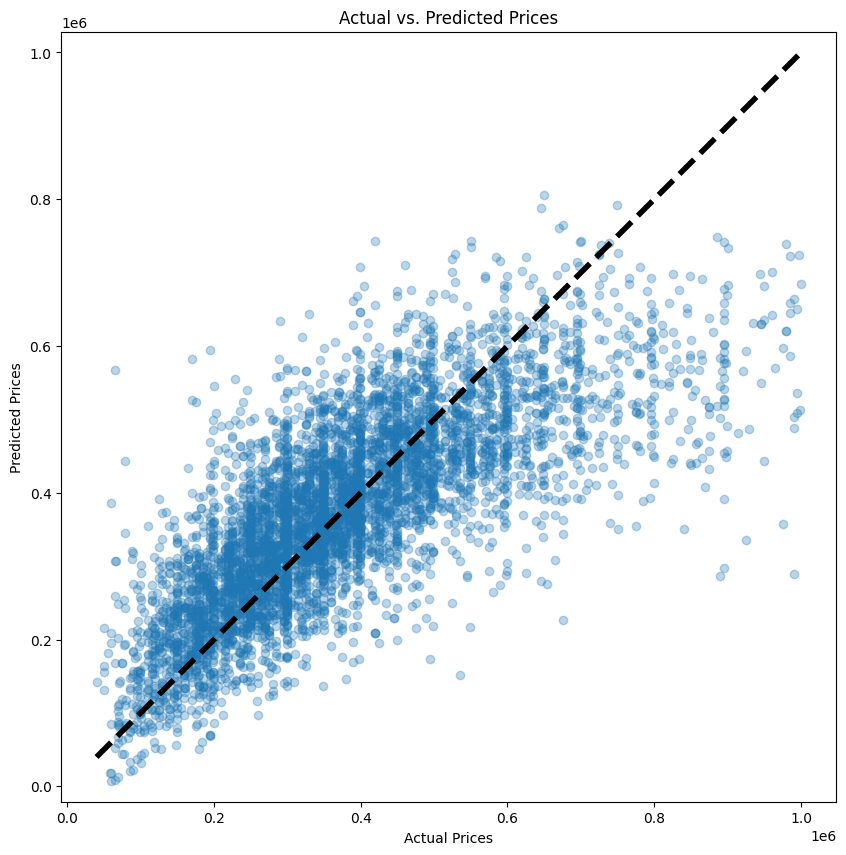

In [111]:
import matplotlib.pyplot as plt

# Assuming `y_test` contains the actual prices and `y_pred` contains the model's predictions
actual = y_test
predicted = y_pred

plt.figure(figsize=(10, 10))
plt.scatter(actual, predicted, alpha=0.3)
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# Plotting the perfect prediction line
plt.plot([actual.min(), actual.max()], [
         actual.min(), actual.max()], 'k--', lw=4)
plt.axis('equal')

plt.show()

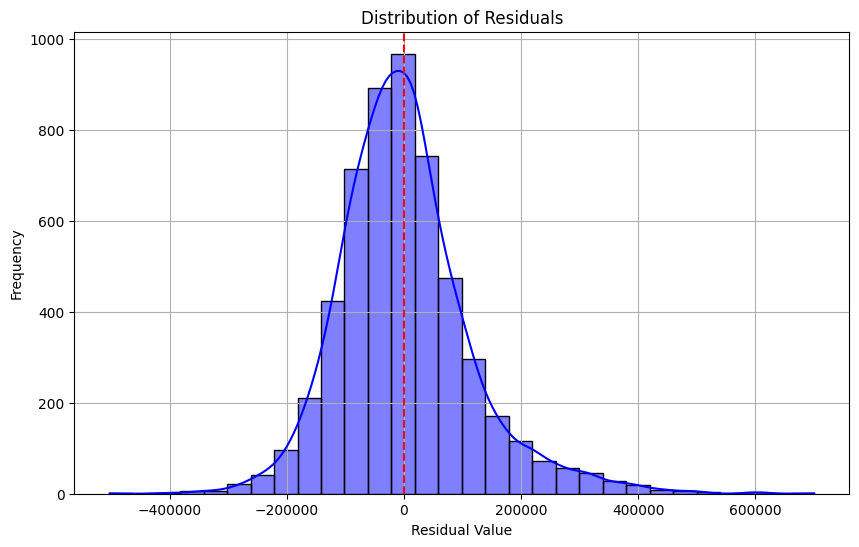

In [112]:

residuals = y_test - y_pred


plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
# This line indicates where the residual is zero
plt.axvline(x=0, color='red', linestyle='--')
plt.grid(True)
plt.show()

In [113]:
# Get feature names from the preprocessor
# For one-hot encoded categorical features
encoded_features = preprocessor.named_transformers_[
    'cat'].get_feature_names_out(categorical_features)
# For the remaining numerical features
numerical_features = X.drop(columns=categorical_features).columns

# Combine all feature names
all_features = np.concatenate([encoded_features, numerical_features])

# Retrieve the coefficients of the model and pair them with feature names
feature_weights = pd.Series(model.coef_, index=all_features)

print(feature_weights)

district_aalst                  4733.443265
district_antwerp               65911.483339
district_arlon                 10007.470368
district_ath                  -30968.849128
district_bastogne             -31769.096699
district_brugge               105171.563627
district_brussels             206152.735688
district_charleroi           -100361.617624
district_dendermonde           33034.003208
district_diksmuide            -11660.842210
district_dinant               -59267.747363
district_eeklo                  8091.611069
district_gent                  88135.372363
district_halle-vilvoorde       98388.557931
district_hasselt              -27394.486567
district_huy                  -28471.499463
district_ieper                -21502.645651
district_kortrijk              -8535.173210
district_leuven                65771.161562
district_liège                -37842.340978
district_maaseik               -5157.004035
district_marche-en-famenne    -16616.703878
district_mechelen              5

district_aalst                  4733.443265
district_antwerp               65911.483339
district_arlon                 10007.470368
district_ath                  -30968.849128
district_bastogne             -31769.096699
district_brugge               105171.563627
district_brussels             206152.735688
district_charleroi           -100361.617624
district_dendermonde           33034.003208
district_diksmuide            -11660.842210
district_dinant               -59267.747363
district_eeklo                  8091.611069
district_gent                  88135.372363
district_halle-vilvoorde       98388.557931
district_hasselt              -27394.486567
district_huy                  -28471.499463
district_ieper                -21502.645651
district_kortrijk              -8535.173210
district_leuven                65771.161562
district_liège                -37842.340978
district_maaseik               -5157.004035
district_marche-en-famenne    -16616.703878
district_mechelen              58998.700886
district_mons                -105993.361879
district_mouscron             -29843.003951
district_namur                -22785.711697
district_neufchâteau          -39296.273037
district_nivelles              88332.387229
district_oostend               21612.129604
district_oudenaarde           -24207.784734
district_philippeville        -45912.813088
district_roeselare            -28104.123345
district_sint-niklaas          29460.975741
district_soignies             -42173.434525
district_thuin                -87031.624331
district_tielt                  4240.676472
district_tongeren             -27458.195675
district_tournai              -36209.818376
district_turnhout              11551.968268
district_verviers             -28548.565548
district_veurne                32647.219417
district_virton               -17194.022988
district_waremme              -17934.720060
state_construction             -3900.532907
living_area                     1196.680767
bedrooms                        5101.097119
bathrooms                      38135.435387
has_garden                     -5672.961161
kitchen                        33824.480047
fireplace                      -2946.476909
swimmingpool                  105604.502809
has_terrace                     9057.038299
has_attic                     -15037.712354
has_basement                   -9701.389027
epc                           -20676.927778
area_total                         2.091184
dtype: float64


In [114]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [115]:
forest.score(X_test, y_test)

0.7176493211572132

In [125]:
from sklearn.model_selection import GridSearchCV
param_grid = {
  'n_estimators': [30, 50, 100],
  'max_features': [6, 8, 10, 12],
  'min_samples_split': [2, 4, 6, 8]
}
grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [6, 8, 10, 12],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [126]:
best_forest=grid_search.best_estimator_
best_forest

RandomForestRegressor(max_features=10)

In [127]:
best_forest.score(X_test, y_test)

0.7318848453590048